# BIG DATA ANALYTICS: Digit Recognition Scikit Learn
Scikit Learn 라이브러리를 활용한 Digit Recogntion을 연습합니다
- https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
____

## 1. Dataset 다운로드

In [1]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [2]:
sample_size = 1000
train_images = train_images[:sample_size]
train_labels = train_labels[:sample_size]

## 2. 관련 라이브러리 import

In [3]:

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

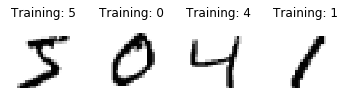

In [4]:
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(train_images, train_labels))

for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## 3. 모델 훈련

In [5]:
classifier = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test =\
    train_images.reshape((len(train_images), -1)), test_images.reshape((len(test_images), -1)), \
    train_labels, test_labels

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## 4. 모델 검증

Classification report for classifier LogisticRegression(max_iter=10000):
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       980
           1       0.95      0.96      0.96      1135
           2       0.83      0.86      0.85      1032
           3       0.85      0.75      0.80      1010
           4       0.88      0.84      0.86       982
           5       0.72      0.76      0.74       892
           6       0.88      0.88      0.88       958
           7       0.82      0.88      0.85      1028
           8       0.80      0.75      0.78       974
           9       0.77      0.78      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000


Confusion matrix:
[[ 929    0   12    4    0    4   11   10    6    4]
 [   0 1093    2    2    1    2    5    4   25    1]
 [   9   12  891   18   11    2   23   17  

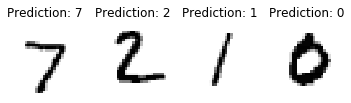

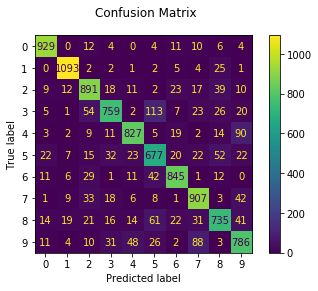

In [6]:
predicted = classifier.predict(X_test)
_, axes = plt.subplots(1, 4)
images_and_predictions = list(zip(test_images, predicted))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

## 5. 모델 저장

In [7]:
from joblib import dump, load
dump(classifier, 'my_digit_model.joblib') 


['my_digit_model.joblib']

## 6. 저장 확인

In [8]:
clf = load('my_digit_model.joblib') 
print(clf)

LogisticRegression(max_iter=10000)


In [9]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [10]:
X_test.shape

(10000, 784)

In [11]:
clf.predict(X_test[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 2, 9], dtype=uint8)